# K Means

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

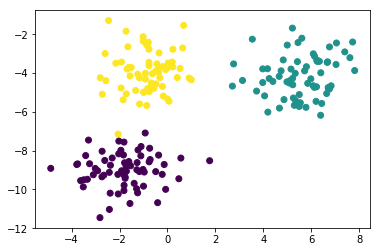

In [2]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
#plt.axis([-5,10,-12,-1])
plt.show()

In [4]:
y = y.reshape(-1,1)
x = X

### Cost function

In [5]:
def cost(x,c,mu):
    ctot = 0
    m = x.shape[0]
    for i,mu_i in enumerate(mu):
        pos = np.where(c[:,0] == i)[0]
        ctot += (np.sum((x[pos,:] - mu[i,:])**2))
    return ctot / m

### Kmeans cluster 

In [6]:
def kmeans_cluster(x, k):
    m = x.shape[0]
    c = np.zeros((m,1))
    x1 = pd.DataFrame(x)
    mu = np.array(x1.sample(frac=(k/m)).reset_index(drop=True),copy=True)
    mu
    dist = np.sum((x - mu[0,:]) ** 2,axis = 1).reshape(-1,1)
    cost_list = []
    cost_list.append(cost(x,c,mu))
    while True:
        flag = True
        for i,mu_i in enumerate(mu):
            dist1 = np.sum((x - mu_i) ** 2,axis = 1).reshape(-1,1)
            pos = np.where(dist1 < dist)[0]
            c[pos,0] = i
            dist[pos,0] = dist1[pos,0]
            if (len(pos) > 0):
                flag = False
        
        c1 = cost(x,c,mu)
        cost_list.append(c1)
        if flag:
            break
        for i,mu_i in enumerate(mu):
            pos = np.where(c[:,0] == i)[0]
            l = len(pos)
            mu[i,:] = (np.sum(x[pos,:],axis = 0) / l)
        
        
    return cost_list, c, mu

In [7]:
def kmeans(x,k):
    cost_list, c, mu = kmeans_cluster(x, k)
    for i in range(1,10):
        cost_list1, c1, mu1 = kmeans_cluster(x, k)
        if cost_list1[-1] < cost_list[-1]:
            cost_list = cost_list1
            mu = mu1
            c = c1
    return cost_list, c, mu

### Calling Kmeans cluster with k = 3

In [8]:
cost_list, c, mu = kmeans(x, 3)


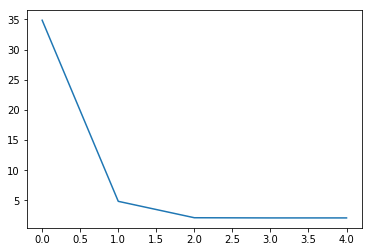

In [9]:
plt.plot(cost_list)


### Drawing decision boundary

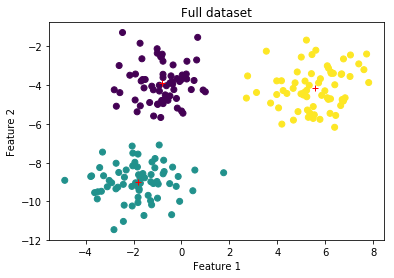

In [10]:
def plot(X,c,mu,title):

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.scatter(X[:,0], X[:,1],c=c.reshape(-1,))
    plt.plot(mu[:,0], mu[:,1],'r+')
    plt.show()
plot(x,c,mu,'Full dataset')


In [11]:
def avg_error(x, y, w):
    h = np.dot(x, w) > 0
    e = np.abs(h - y.clip(min = 0)).sum()
    #print(h.T)
    #print(y.T)
    #print(h - y.clip(min = 0))
    return (e)